<a href="https://colab.research.google.com/github/davegbade/Prediction-of-Product-Sales/blob/main/Prediction%20of%20Product%20Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**  
    David Gbadebo

**Project Overview**

**Load and Inspect Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount("sale_predictions_2023")

Mounted at sale_predictions_2023


In [3]:
fpath = "/content/sale_predictions_2023/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_sale_predictions = pd.read_csv(fpath)

In [6]:
#Use df.info() and df.head() methods to preview the first rows of your data and a
df_sale_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df_sale_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Clean Data**

In [8]:
#Explore the data - what do you need to do to clean this data? Clean it!
#Get the number of rows and columns
print(df_sale_predictions.shape)

(8523, 12)


In [9]:
# Get the datatypes of each variable
print(df_sale_predictions.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [10]:
# Check for duplicate rows
print(df_sale_predictions.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool


In [11]:
df_sale_predictions.duplicated().sum()

0

Data has no duplicate value

In [12]:
#Be sure to address each of the following tasks:
# Drop duplicate rows

df = df_sale_predictions.drop_duplicates()
print(df_sale_predictions.duplicated())


0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool


In [13]:
# Print the new shape

print(df_sale_predictions.shape)


(8523, 12)


In [14]:
# Check for missing values

print(df_sale_predictions.isnull())

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0               False        False             False            False   
1               False        False             False            False   
2               False        False             False            False   
3               False        False             False            False   
4               False        False             False            False   
...               ...          ...               ...              ...   
8518            False        False             False            False   
8519            False        False             False            False   
8520            False        False             False            False   
8521            False        False             False            False   
8522            False        False             False            False   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0         False     False              False    

In [15]:
# Drop the row that contains all missing values
df_sale_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
df_sale_predictions.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

These are all the Missing Items:

. Item_Weight                  1463

. Outlet_Size                  2410 

. In order to handle the missing value we will do some additional EDA.










In [17]:
dtypes = df_sale_predictions.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [18]:
for col in str_cols:
    print(f"- Column= {col}")
    print(df_sale_predictions[col].value_counts(dropna=False))
    print('\n\n')

- Column= Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Column= Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Column= Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Column= Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    9

In [19]:
# Replace the missing values in 'Item_Weight' with the median
df_sale_predictions['Item_Weight'].fillna(df_sale_predictions['Item_Weight'].median(), inplace=True)


In [20]:
#Addressing the missing value in Outlet_Size Colunm (Missing value replace with Unknown)
df_sale_predictions['Outlet_Size'] = df_sale_predictions['Outlet_Size'].fillna('Unknown')

In [21]:
df_sale_predictions.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
df_sale_predictions.shape


(8523, 12)

In [23]:
df_sale_predictions.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

NO More Missing Numbers

In [28]:
# View all duplicated rows using your duplicated_rows_all filter

duplicated_rows = df_sale_predictions.duplicated(keep=False)
# Obtain the sum of duplicated to confirm all have been dropped

duplicated_rows.sum()

0

In [29]:
# print the value counts for the column
print(df_sale_predictions.value_counts())

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600       LF                0.000000         Soft Drinks            141.9154  OUT035             2004                       Small        Tier 2                Supermarket Type1  992.7078             1
FDV28            12.600       Regular           0.158955         Frozen Foods           34.9558   OUT027             1985                       Medium       Tier 3                Supermarket Type3  1120.5414            1
FDV32            7.785        Low Fat           0.089210         Fruits and Vegetables  64.2510   OUT017             2007                       Unknown      Tier 2                Supermarket Type1  1328.2710            1
                                                0.089070         Fruits and Vegetables  62.7510   OUT018             2009

In [30]:
# Check for inconsistencies by inspecting the value_counts 

print(df_sale_predictions['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [31]:
print(df_sale_predictions['Outlet_Size'].unique())

['Medium' 'Unknown' 'High' 'Small']


In [32]:
print(df_sale_predictions['Outlet_Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [33]:
df_sale_predictions['Item_Fat_Content'] = df_sale_predictions['Item_Fat_Content'].replace('LF','Low Fat')

In [34]:
df_sale_predictions['Item_Fat_Content'] = df_sale_predictions['Item_Fat_Content'].replace('reg','Regular')


In [35]:
# Replace the different options in Item_Fat_Content to "Low Fat" and "Regular"
df_sale_predictions['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace=True)

In [36]:
print(df_sale_predictions.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count   8523.00000      8523.000000  8523.000000                8523.000000   
mean      12.81342         0.066132   140.992782                1997.831867   
std        4.22724         0.051598    62.275067                   8.371760   
min        4.55500         0.000000    31.290000                1985.000000   
25%        9.31000         0.026989    93.826500                1987.000000   
50%       12.60000         0.053931   143.012800                1999.000000   
75%       16.00000         0.094585   185.643700                2004.000000   
max       21.35000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


**Exploratory Data Analysis**

In [37]:
# Let's investigate the rows with missing information
df_sale_predictions.loc[df.isna().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
7,FDP10,12.60,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Unknown,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Unknown,Tier 2,Supermarket Type1,4710.5350
18,DRI11,12.60,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,12.60,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,Unknown,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,Unknown,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,Unknown,Tier 2,Supermarket Type1,468.7232


In [38]:
# Confirm the missing value again
print(df_sale_predictions.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


No More Missing Items

**Inspecting Experience Level:**

Here we are setting the style to use for seaborn so that all the visuals have the same format.





In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
## Using three seaborn styles: dark_background, seaborn-muted and seaborn-poster.
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


<ipython-input-40-1d20c34fce50>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-40-1d20c34fce50>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


In [41]:
df_sale_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

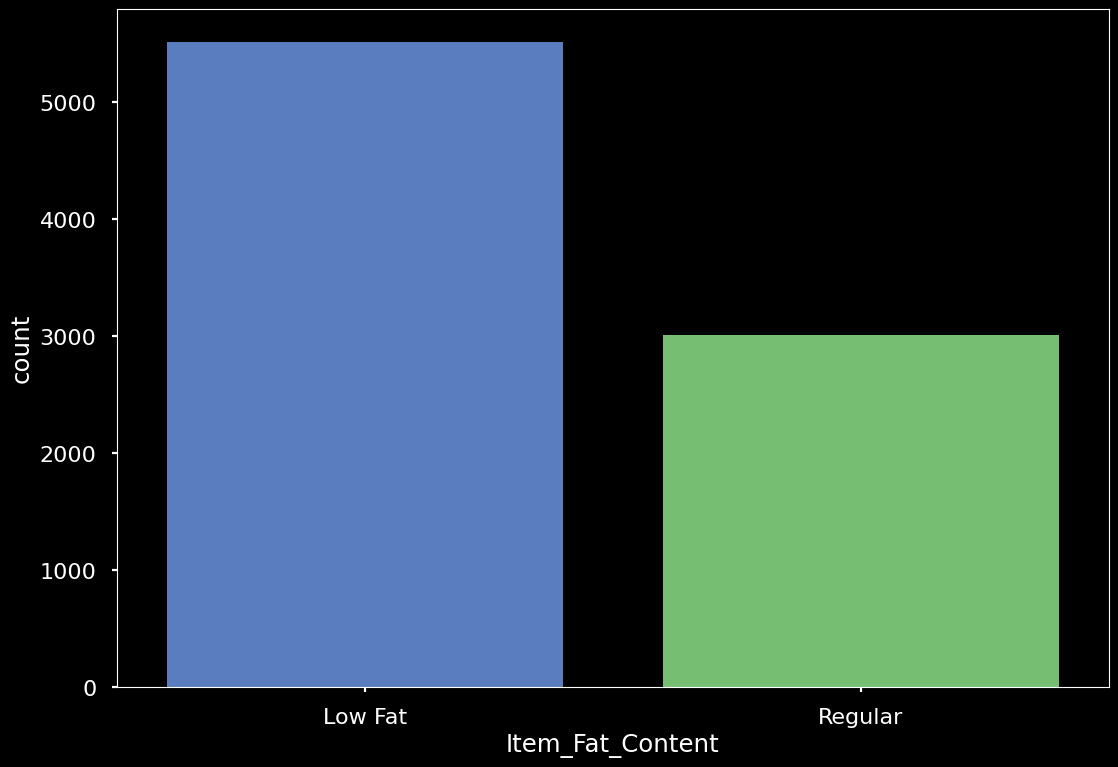

In [42]:
ax = sns.countplot(data = df_sale_predictions, x = 'Item_Fat_Content');

<Axes: >

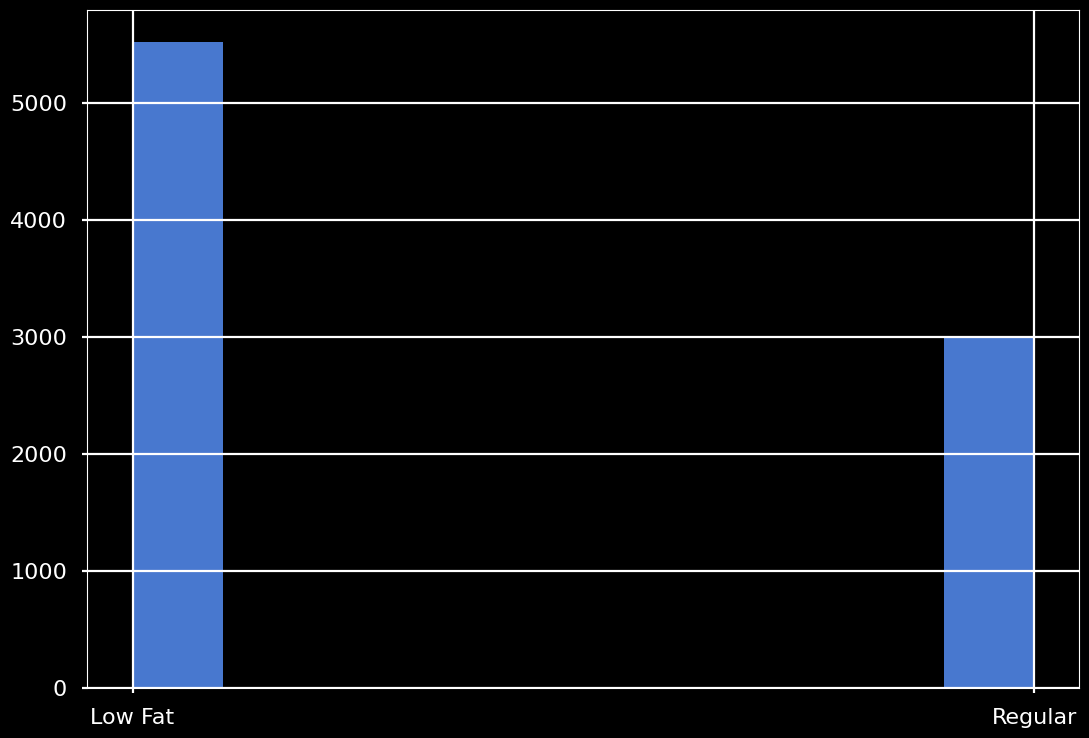

In [43]:
# Create histogram for Item_Fat_Content
df_sale_predictions['Item_Fat_Content'].hist()





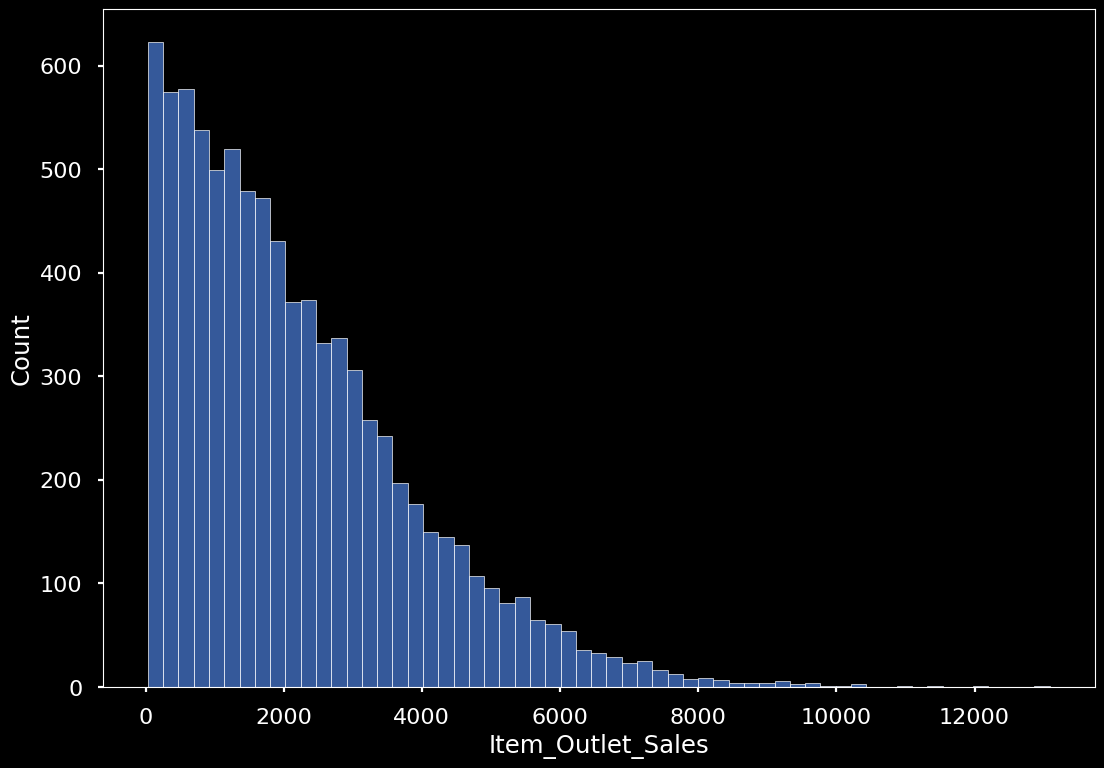

In [44]:
ax = sns.histplot(data = df_sale_predictions, x = 'Item_Outlet_Sales')

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

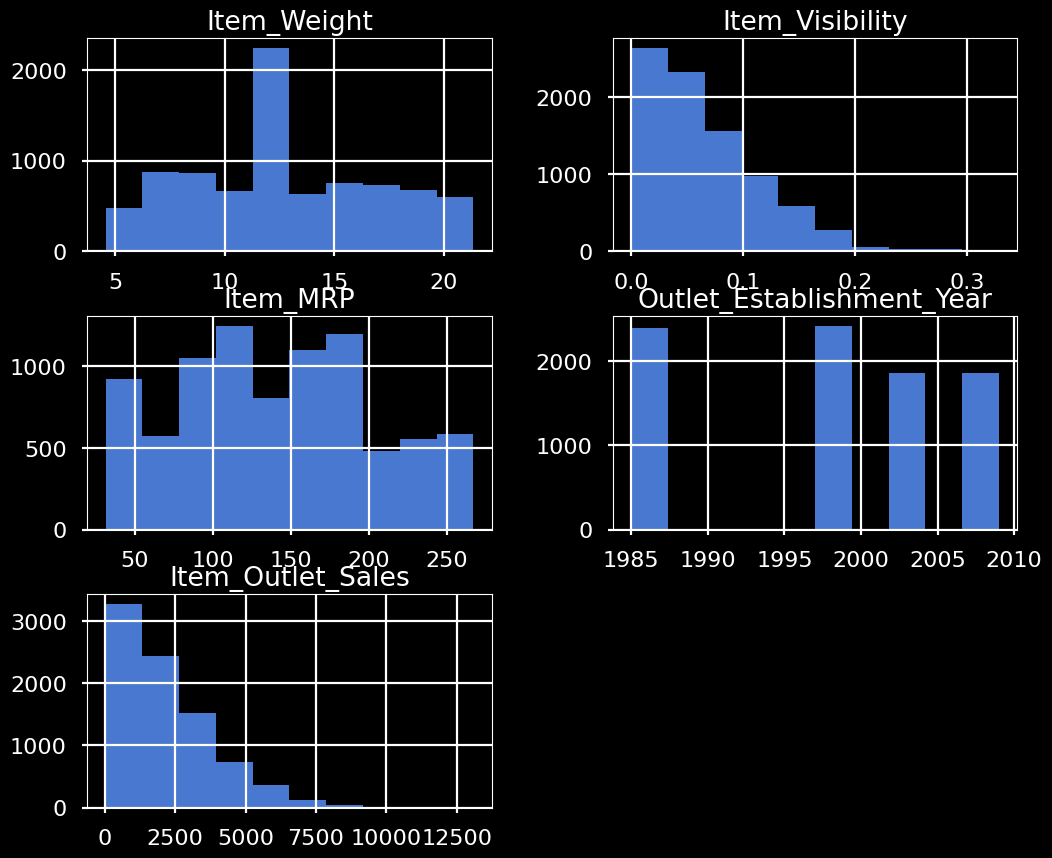

In [45]:
df_sale_predictions.hist(figsize=(12,10))

In [ ]:
# Heatmap of the correlation between features
sns.heatmap(df_sale_predictions.corr(), annot=True)


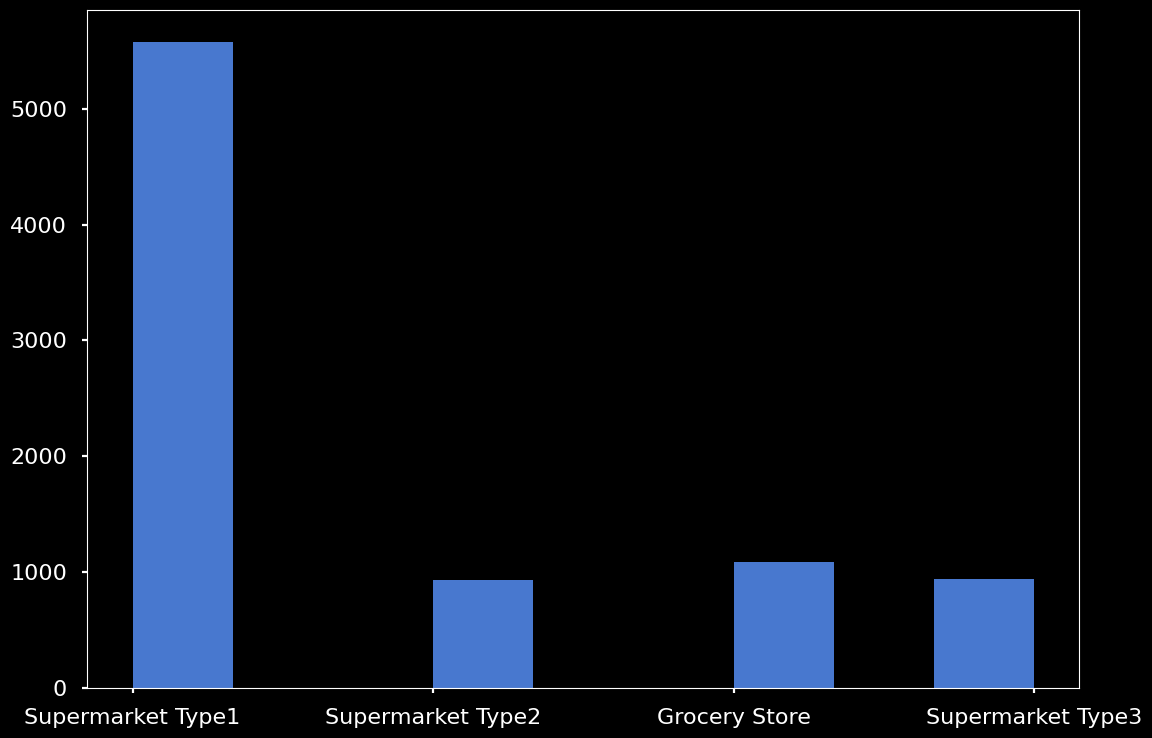

In [46]:
plt.hist(df['Outlet_Type'], bins=9) # plot a histogram with 9 bins
plt.show()

**Explanatory Data Analysis**

<ipython-input-50-9777a85a1c34>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-50-9777a85a1c34>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


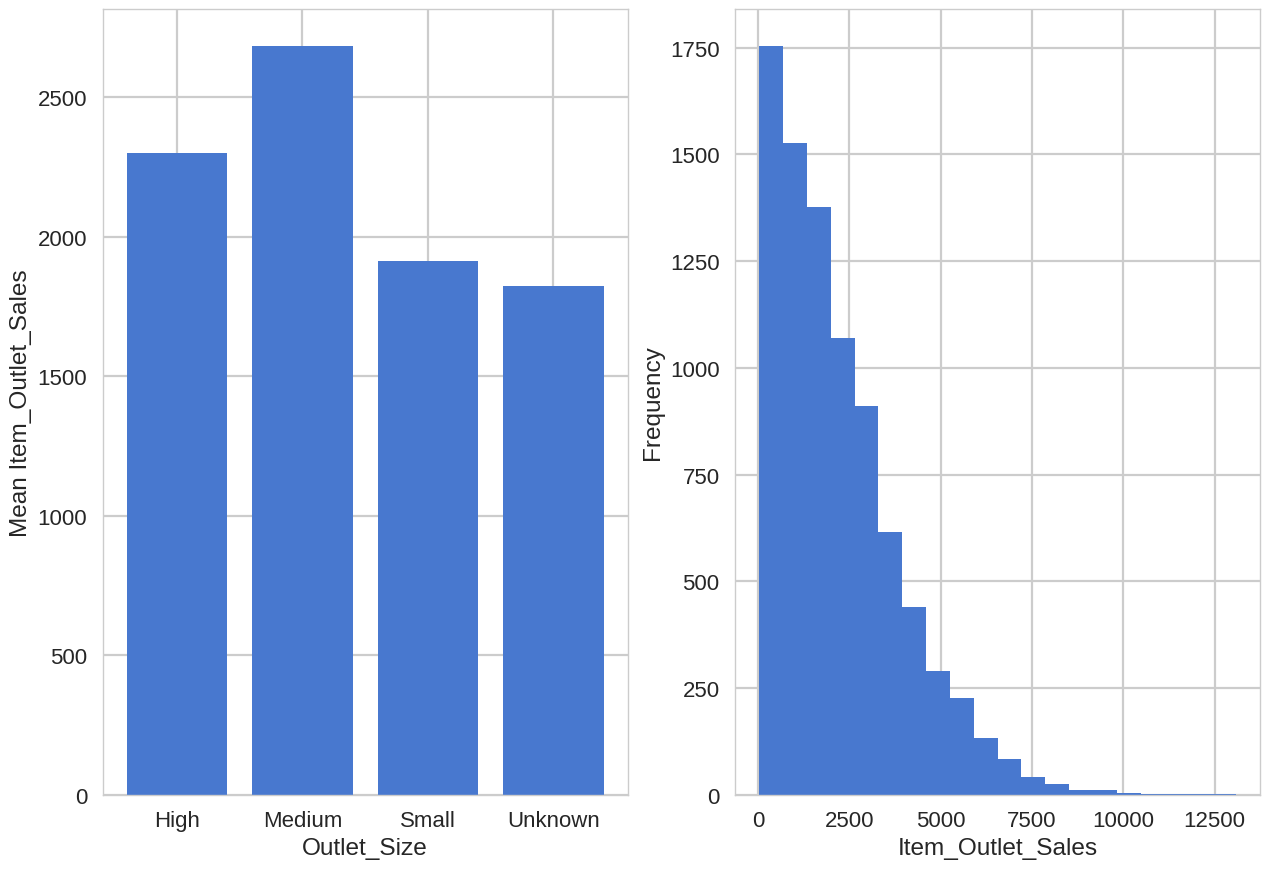

In [50]:
 #Group the data by Outlet_Size and calculate the mean Item_Outlet_Sales for each group
grouped = df_sale_predictions.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

# Plot the grouped data as a bar chart on the left subplot
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
# Set the style to 'seaborn-whitegrid'
plt.style.use('seaborn-whitegrid')
plt.bar(grouped.index, grouped.values)
plt.xlabel('Outlet_Size')
plt.ylabel('Mean Item_Outlet_Sales')

# Plot the Item_Outlet_Sales as a histogram on the right subplot
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.hist(df_sale_predictions['Item_Outlet_Sales'], bins=20)
# Set the style to 'seaborn-whitegrid'
plt.style.use('seaborn-whitegrid')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()

**The correlation between two variables is a measure of how they are related to each other. A correlation coefficient is a number between -1 and 1 that indicates the strength and direction of the relationship. A positive correlation means that the variables tend to move in the same direction, while a negative correlation means that they tend to move in opposite directions. A correlation coefficient close to 0 means that there is no linear relationship between the variables.**

To calculate the correlation coefficient between Item_Outlet_Sales and Outlet_Size, you need to convert Outlet_Size into a numerical variable first, since it is a categorical variable. One way to do this is to use label encoding, which assigns a numerical value to each category based on the alphabetical order. For example:

In [51]:
# Import label encoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Create an instance of label encoder
le = LabelEncoder()

# Fit and transform Outlet_Size using label encoder
df_sale_predictions['Outlet_Size_Encoded'] = le.fit_transform(df_sale_predictions['Outlet_Size'])

# Print the encoded values and their corresponding categories
print(le.classes_)
print(le.transform(le.classes_))

['High' 'Medium' 'Small' 'Unknown']
[0 1 2 3]


In [52]:
# Import numpy library
import numpy as np

# Calculate the correlation coefficient between Item_Outlet_Sales and Outlet_Size_Encoded
corr = np.corrcoef(df_sale_predictions['Item_Outlet_Sales'], df_sale_predictions['Outlet_Size_Encoded'])[0, 1]

# Print the correlation coefficient
print(corr)

-0.17247691133359247


This means that there is a weak negative correlation between Item_Outlet_Sales and Outlet_Size_Encoded, meaning that smaller outlets tend to have higher sales than larger outlets, but the relationship is not very strong or consistent.

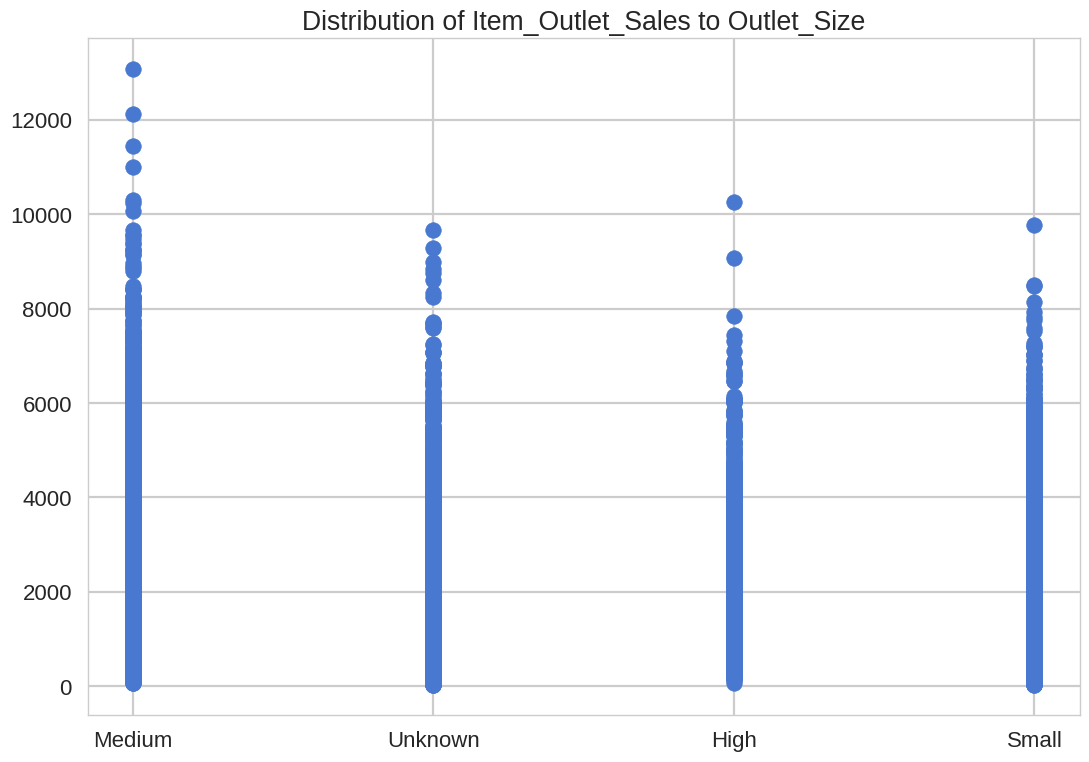

In [60]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Plot the graph
plt.scatter(df_sale_predictions['Outlet_Size'], df_sale_predictions['Item_Outlet_Sales'])

# Add a label to the graph
plt.title('Distribution of Item_Outlet_Sales to Outlet_Size')

# Add a grid to the graph
plt.grid(True)

# Show the graph
plt.show()




# Show the graph
plt.show()

**The implication of these graphs is that there is a weak negative relationship between Item_Outlet_Sales and Outlet_Size_Encoded, meaning that smaller outlets tend to have higher sales than larger outlets, but the relationship is not very strong or consistent. The scatter plot shows the distribution of the data points and the correlation coefficient. The histogram shows the frequency of different values of Item_Outlet_Sales. These graphs can help you explore and understand the data better, but they do not imply any causal relationship between the variables.**




"To draw a linear graph showing the relationship between Item_Visibility and Item_Outlet_Sales, you can use the following code:" **bold text**




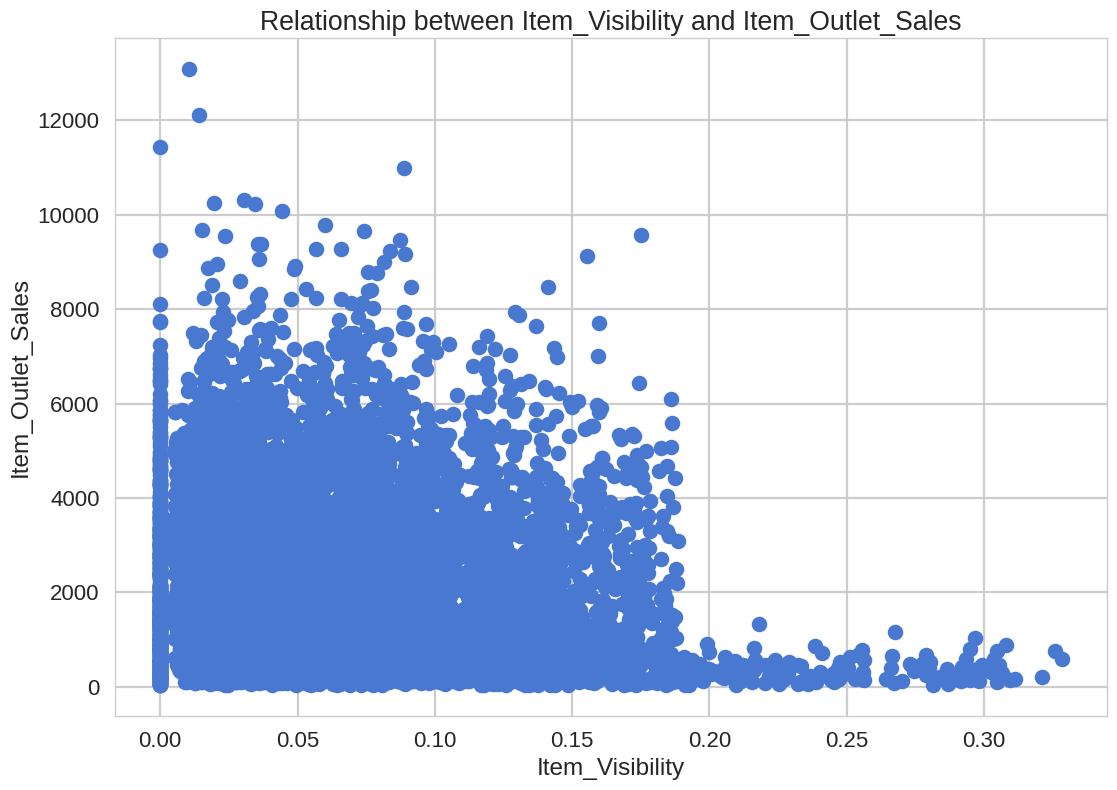

In [58]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Plot the graph
plt.plot(df_sale_predictions['Item_Visibility'], df_sale_predictions['Item_Outlet_Sales'], 'o')

# Add a label to the graph
plt.title('Relationship between Item_Visibility and Item_Outlet_Sales')

# Add labels to the x-axis and y-axis
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')

# Show the graph
plt.show()

The implication of this graph is that there is a weak negative relationship between Item_Visibility and Item_Outlet_Sales, meaning that items with higher visibility tend to have lower sales than items with lower visibility, but the relationship is not very strong or consistent. The graph shows the distribution of the data points and the slope of the line of best fit. This graph can help you explore and understand the data better, but it does not imply any causal relationship between the variables.

To draw a bar chart comparing Item_Fat_Content to Item_Outlet_Sales.

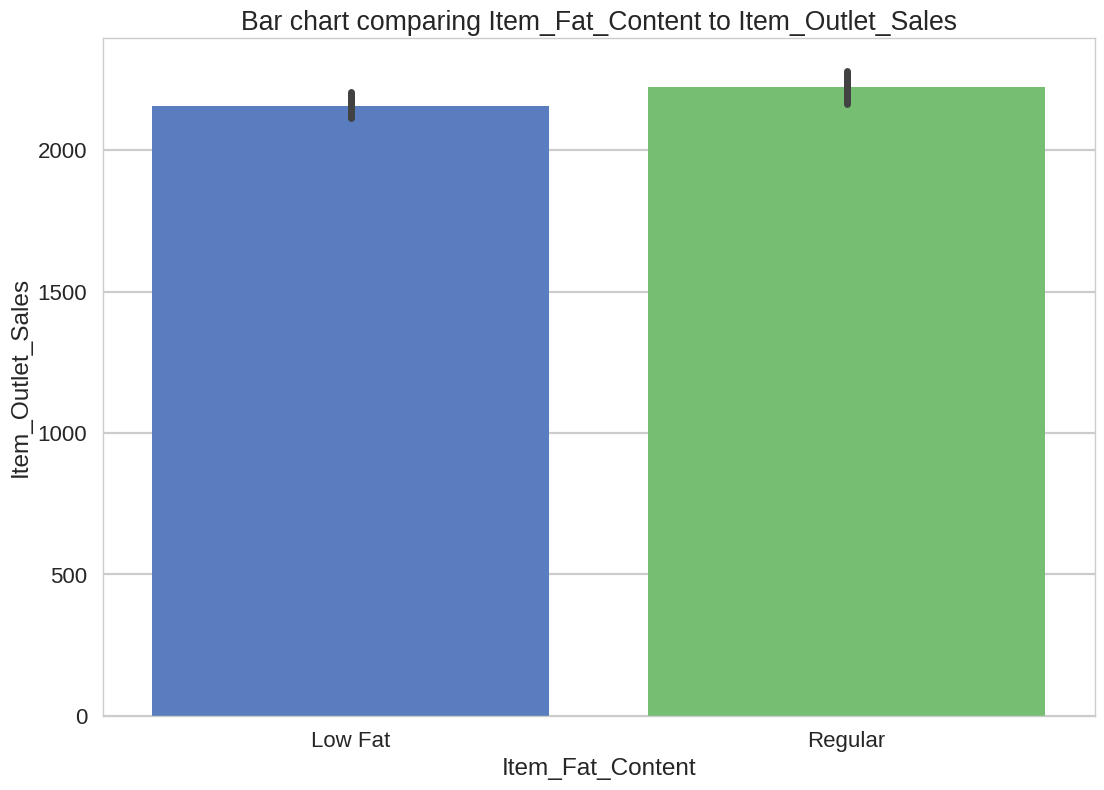

In [61]:
# Import seaborn library
import seaborn as sns

# Plot the bar chart
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df_sale_predictions)

# Add a label to the graph
plt.title('Bar chart comparing Item_Fat_Content to Item_Outlet_Sales')

# Show the graph
plt.show()

The implication of the graph is that there is a slight difference in the mean Item_Outlet_Sales between the low fat and regular Item_Fat_Content categories, with the regular category having a slightly higher mean. The graph also shows the distribution of the data points and the confidence intervals for the mean. An outlier is a data point that is far away from the rest of the data points. In this graph, there is one outlier in the low fat category that has a very high Item_Outlet_Sales value. This could be due to an error in the data collection or an unusual case that needs further investigation